In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 1: Load the data
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

In [3]:
# Step 2: Preview data
def preview_data():
    print("Transactions:")
    print(transactions.head())
    print("\nProducts:")
    print(products.head())
    print("\nCustomers:")
    print(customers.head())

In [4]:
preview_data()

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Customers:
  CustomerID        CustomerName         Reg

In [5]:
# Step 3: Data Cleaning
# Checking for missing values
def check_missing():
    print("Missing values in Transactions:")
    print(transactions.isnull().sum())
    print("\nMissing values in Products:")
    print(products.isnull().sum())
    print("\nMissing values in Customers:")
    print(customers.isnull().sum())

check_missing()

# Handle missing values
transactions.fillna(method='ffill', inplace=True)
products.fillna(method='ffill', inplace=True)
customers.fillna(method='ffill', inplace=True)

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


C:\Users\manoj B P\AppData\Local\Temp\ipykernel_12788\3742620274.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  transactions.fillna(method='ffill', inplace=True)
C:\Users\manoj B P\AppData\Local\Temp\ipykernel_12788\3742620274.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products.fillna(method='ffill', inplace=True)
C:\Users\manoj B P\AppData\Local\Temp\ipykernel_12788\3742620274.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers.fillna(method='ffill', inplace=True)


In [6]:
# Step 4: Merging datasets
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [7]:
print(data)

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetooth

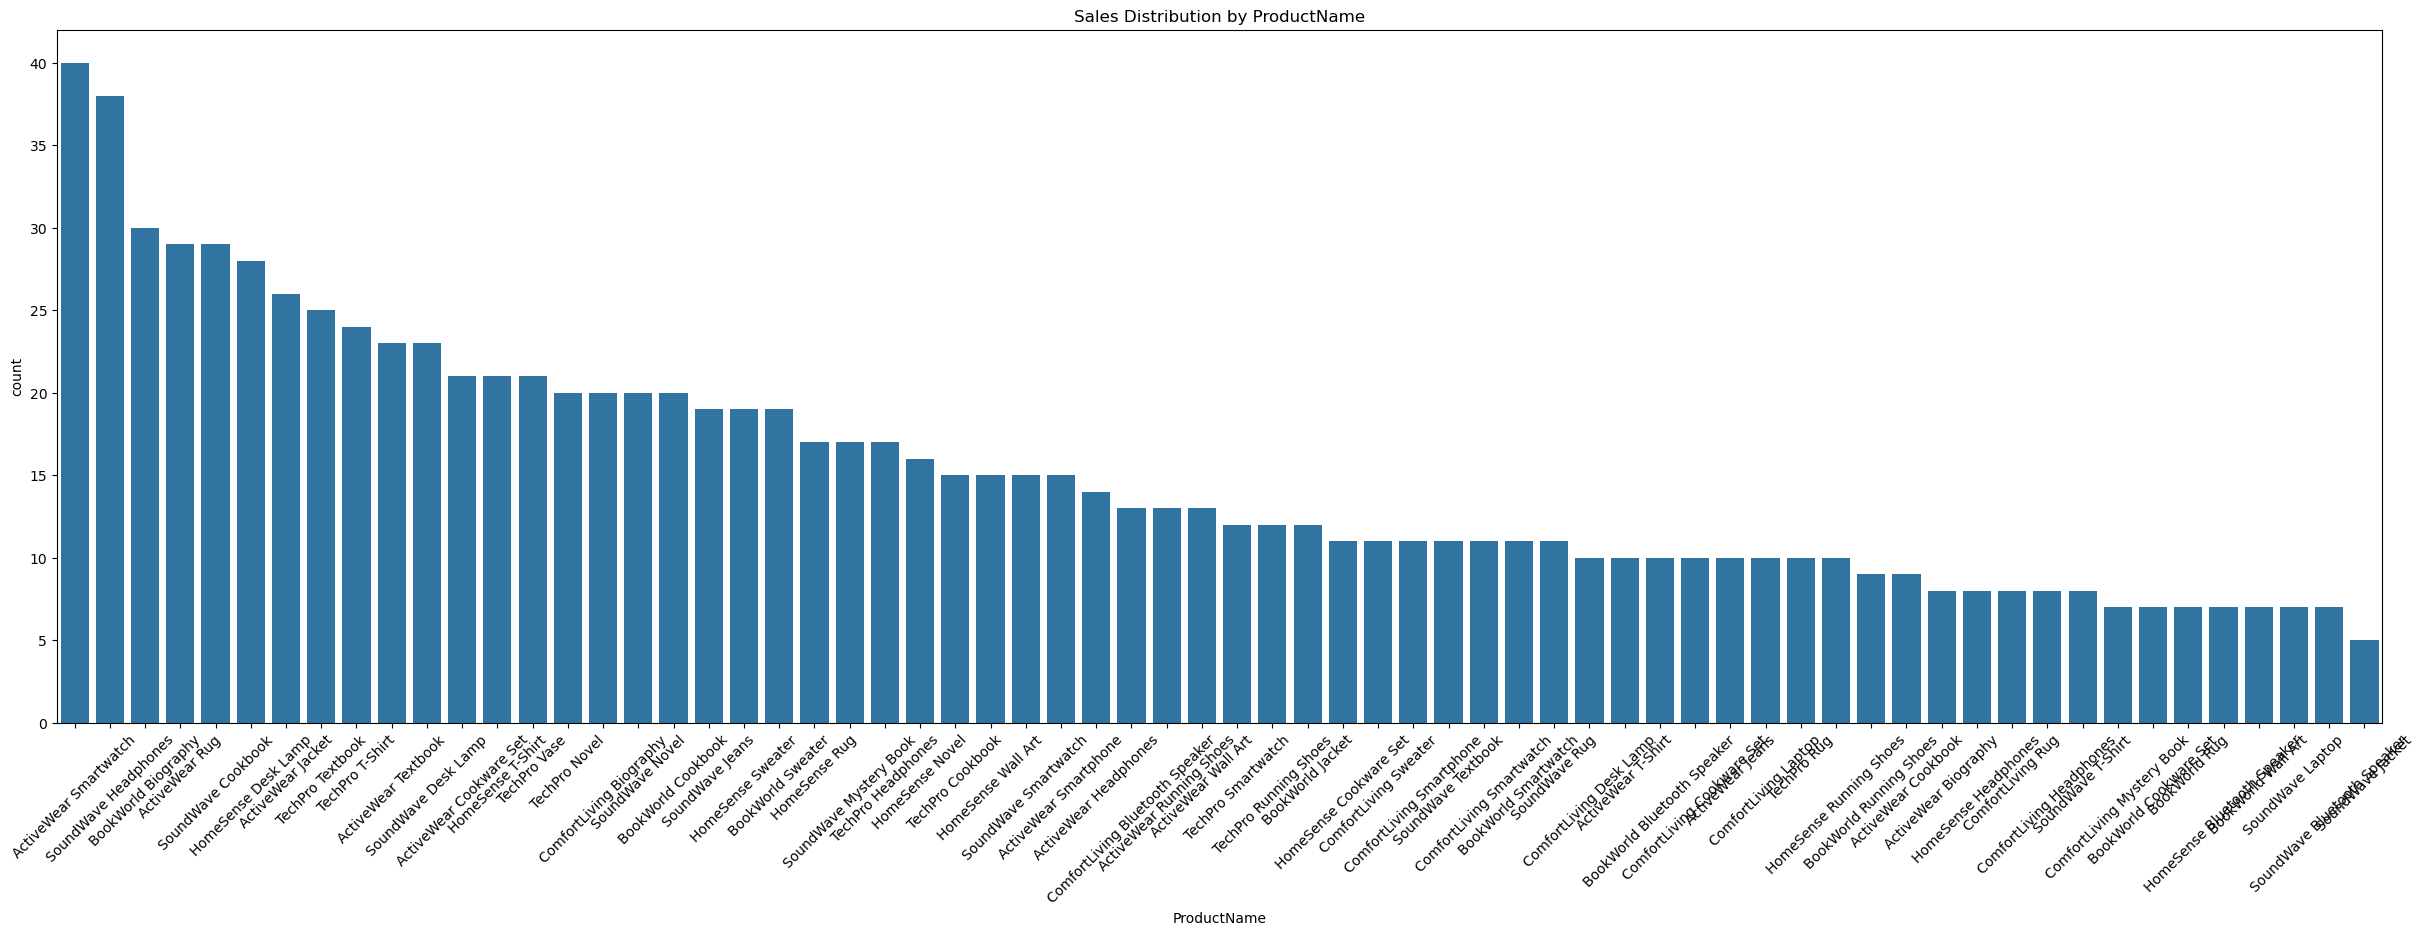

In [8]:
# Step 5: EDA
# 1. Sales distribution by product Name
plt.figure(figsize=(30, 9))
sns.countplot(data=data, x='ProductName', order=data['ProductName'].value_counts().index)
plt.title('Sales Distribution by ProductName')
plt.xticks(rotation=45)
plt.show()


In [9]:
customers_region = customers['Region'].value_counts()

Text(0, 0.5, '')

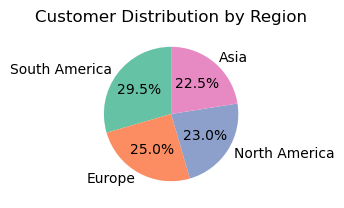

In [10]:
# Sales 2: Customer distribution by region
plt.subplot(2, 2, 3)
customers_region.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Customer Distribution by Region')
plt.ylabel('')

In [11]:
popular_categories = data['Category'].value_counts()

In [12]:
print("Popular Product Categories:")
print(popular_categories, "\n")

Popular Product Categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64 



Text(0, 0.5, 'Number of Sales')

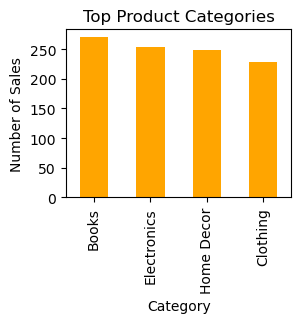

In [13]:
# sales 3: Popular product categories
plt.subplot(2, 2, 4)
popular_categories.plot(kind='bar', color='orange')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

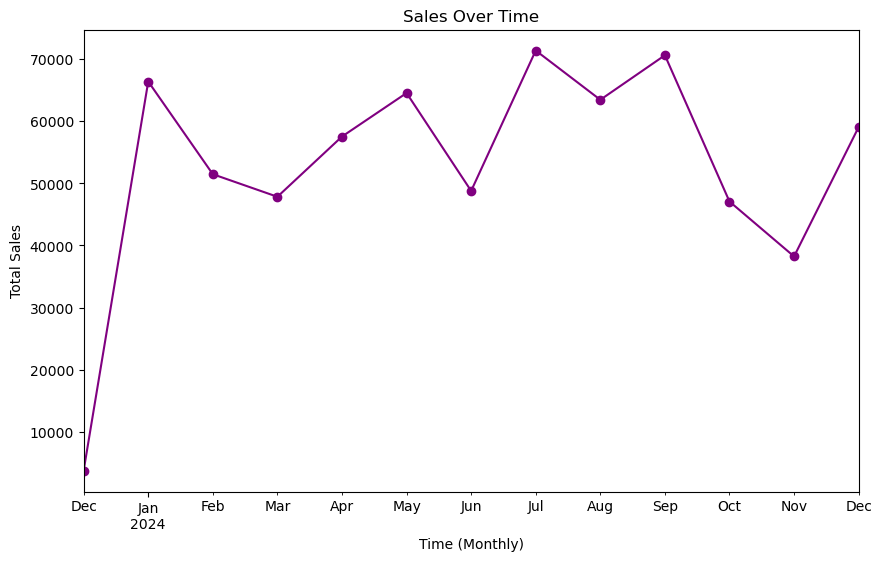

In [19]:
#sales 4.Time-series analysis of sales
if 'TransactionDate' in data.columns:
    data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
    sales_over_time = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    plt.figure(figsize=(10, 6))
    sales_over_time.plot(kind='line', marker='o', color='purple')
    plt.title('Sales Over Time')
    plt.xlabel('Time (Monthly)')
    plt.ylabel('Total Sales')
    plt.show()

In [15]:
top_products_by_quantity = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_by_revenue = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

In [16]:
print("Top Products by Quantity:")
print(top_products_by_quantity, "\n")
print("Top Products by Revenue:")
print(top_products_by_revenue, "\n")

Top Products by Quantity:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64 

Top Products by Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64 



Text(0, 0.5, 'Quantity Sold')

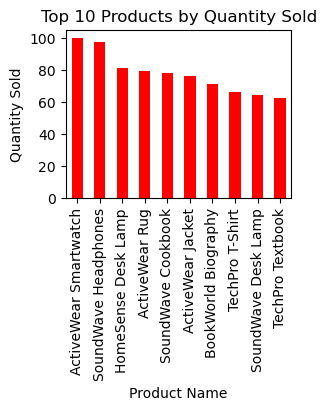

In [17]:
# Sales 5: Top-selling products by quantity
plt.subplot(2, 2, 1)
top_products_by_quantity.plot(kind='bar', color='red')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

## 1. Sales distribution by product Name: Highest distributed products are Activewear smartwatch followed by SoundWave Headphones
## 2. Customer distribution by region:  South America has the highest customer base (29.5%), followed by Europe (25.0%).
## 3. Popular product categories: Books are the most popular category with 270 sales, followed by Electronics 254.
## 4. Time-series analysis of sales: Monthly sales trends help in identifying peak periods for optimized promotions and resource allocation.
## 5. Top-selling products by quantity:  "ActiveWear Smartwatch" leads with 100 units sold, generating $39,097, followed by "SoundWave Headphones" (97 units, $25,212).